In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import xgboost as xgb

In [2]:
Data= pd.read_csv("university_admission.csv")
Data.head() 

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
Data.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admission'],
      dtype='object')

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GRE_Score            1000 non-null   int64  
 1   TOEFL_Score          1000 non-null   int64  
 2   University_Rating    1000 non-null   int64  
 3   SOP                  1000 non-null   float64
 4   LOR                  1000 non-null   float64
 5   CGPA                 1000 non-null   float64
 6   Research             1000 non-null   int64  
 7   Chance_of_Admission  1000 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 62.6 KB


In [6]:
Data.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,316.472000,107.193000,3.114000,3.374000,3.484000,8.57644,0.560000,0.72174
std,11.289494,6.079368,1.142939,0.990507,0.924986,0.60451,0.496635,0.14107
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.80000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.12750,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.56000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.04000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.92000,1.000000,0.97000


In [9]:
(Data.corr())["Chance_of_Admission"]

GRE_Score              0.810351
TOEFL_Score            0.791921
University_Rating      0.690132
SOP                    0.684137
LOR                    0.645365
CGPA                   0.882413
Research               0.545871
Chance_of_Admission    1.000000
Name: Chance_of_Admission, dtype: float64

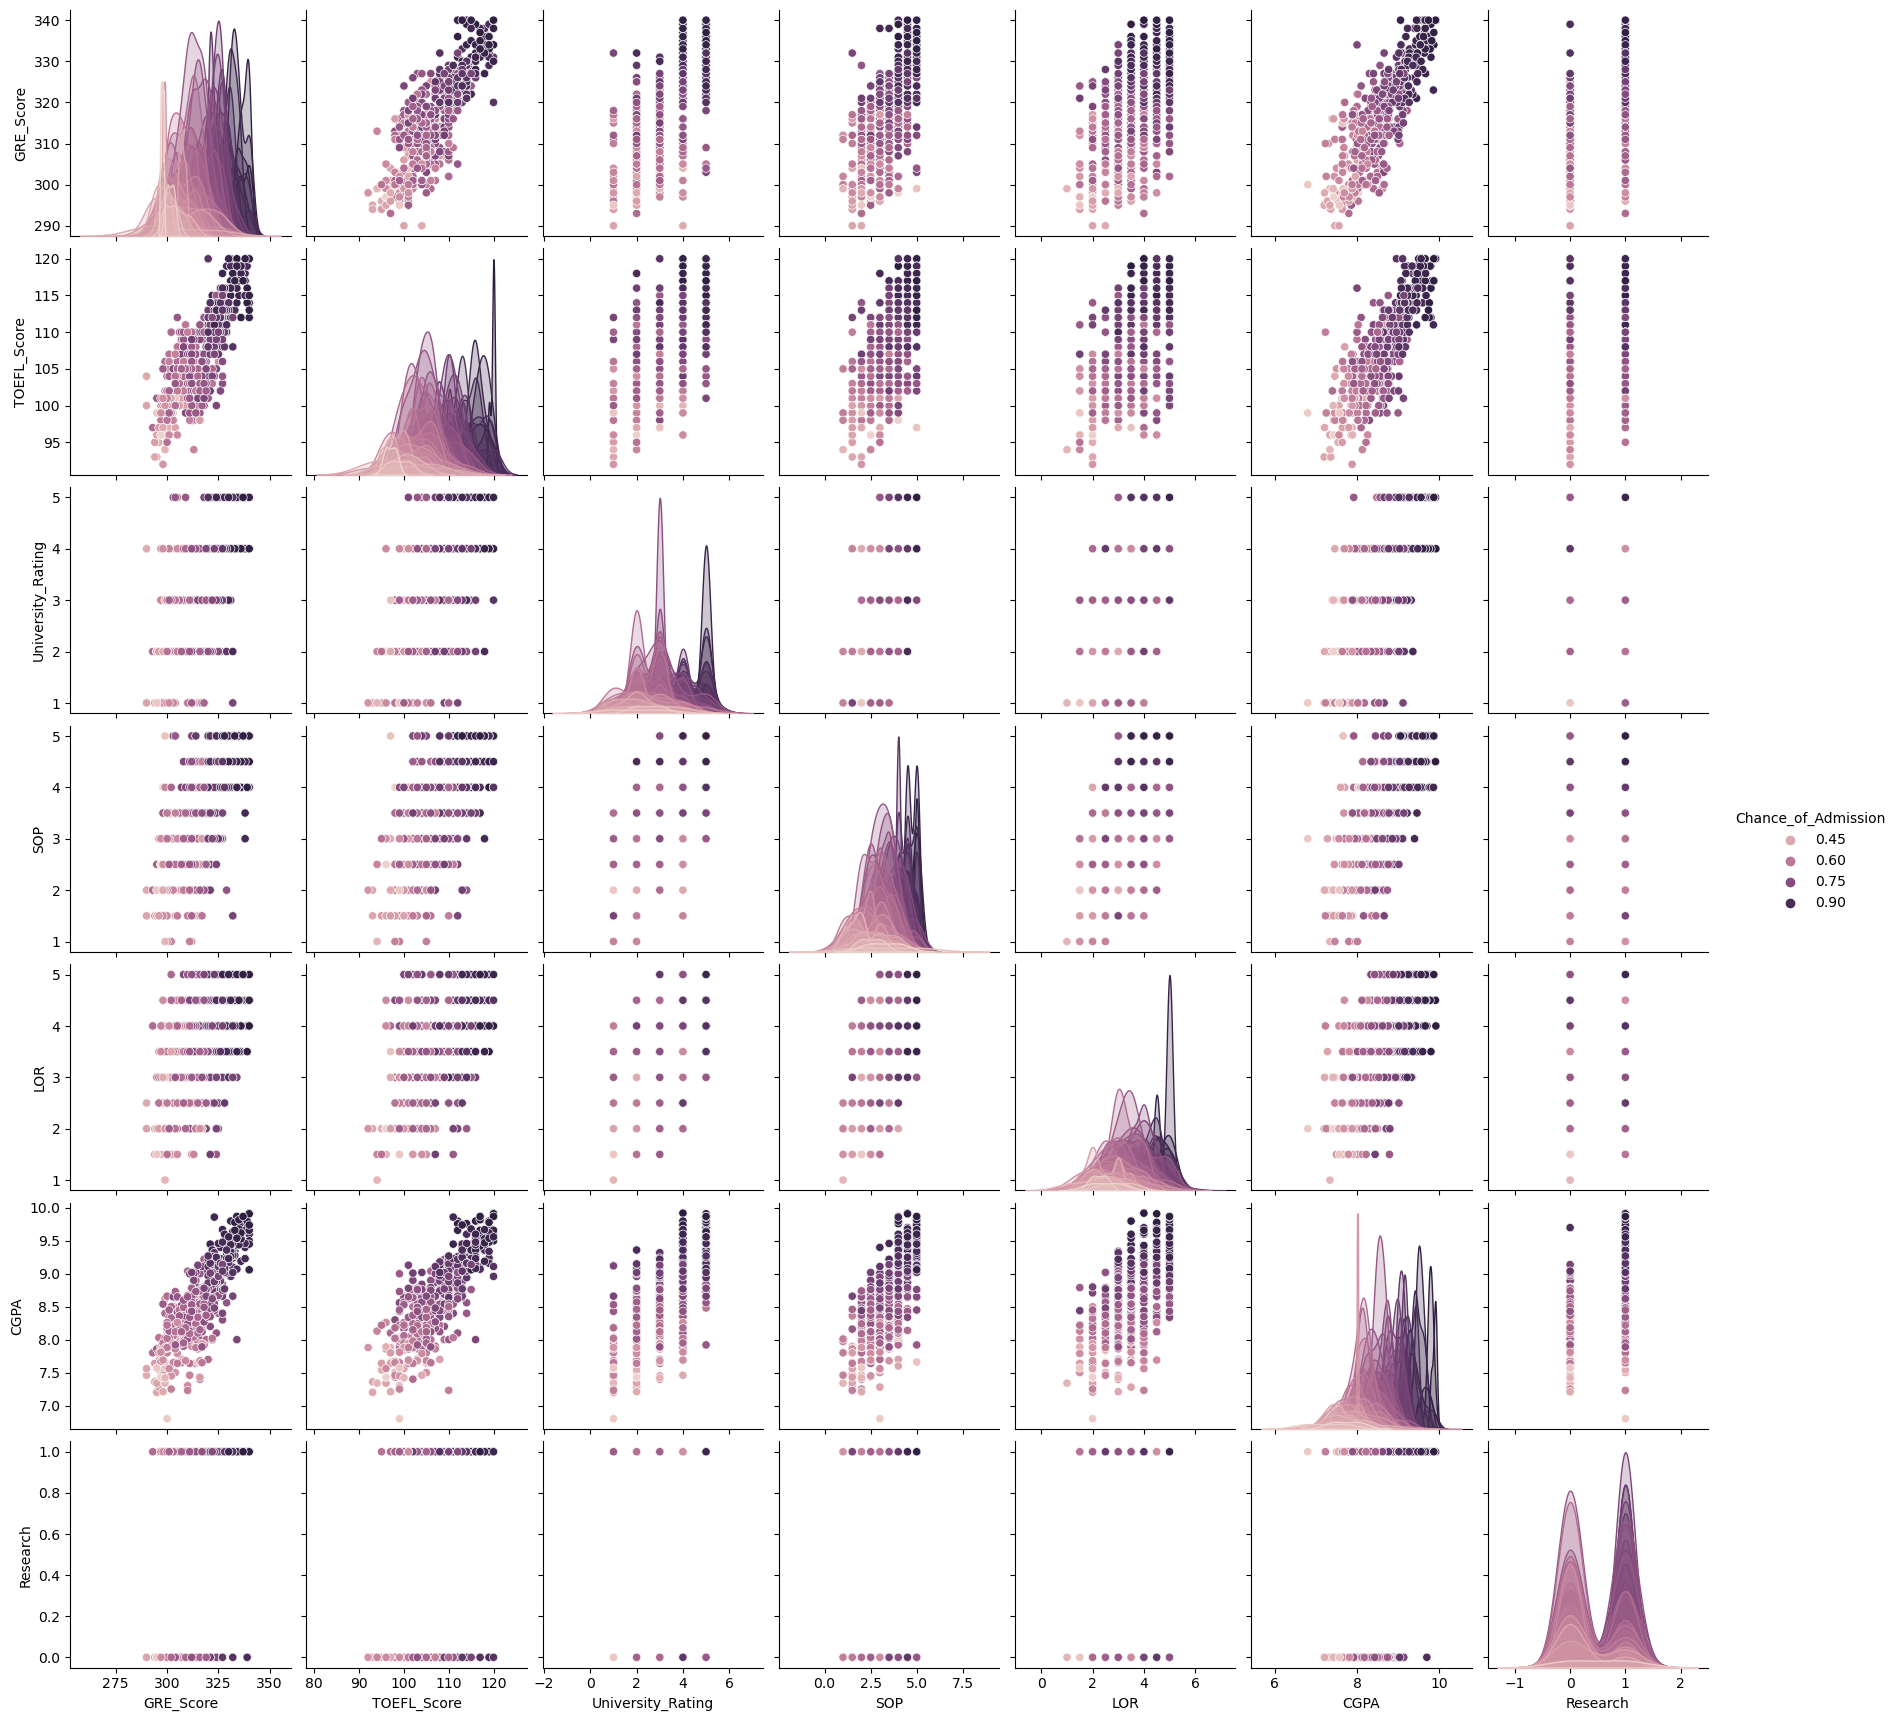

In [18]:
sb.pairplot(Data,hue='Chance_of_Admission',vars=['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research'])

array([[<Axes: title={'center': 'GRE_Score'}>,
        <Axes: title={'center': 'TOEFL_Score'}>,
        <Axes: title={'center': 'University_Rating'}>],
       [<Axes: title={'center': 'SOP'}>, <Axes: title={'center': 'LOR'}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance_of_Admission'}>, <Axes: >]],
      dtype=object)

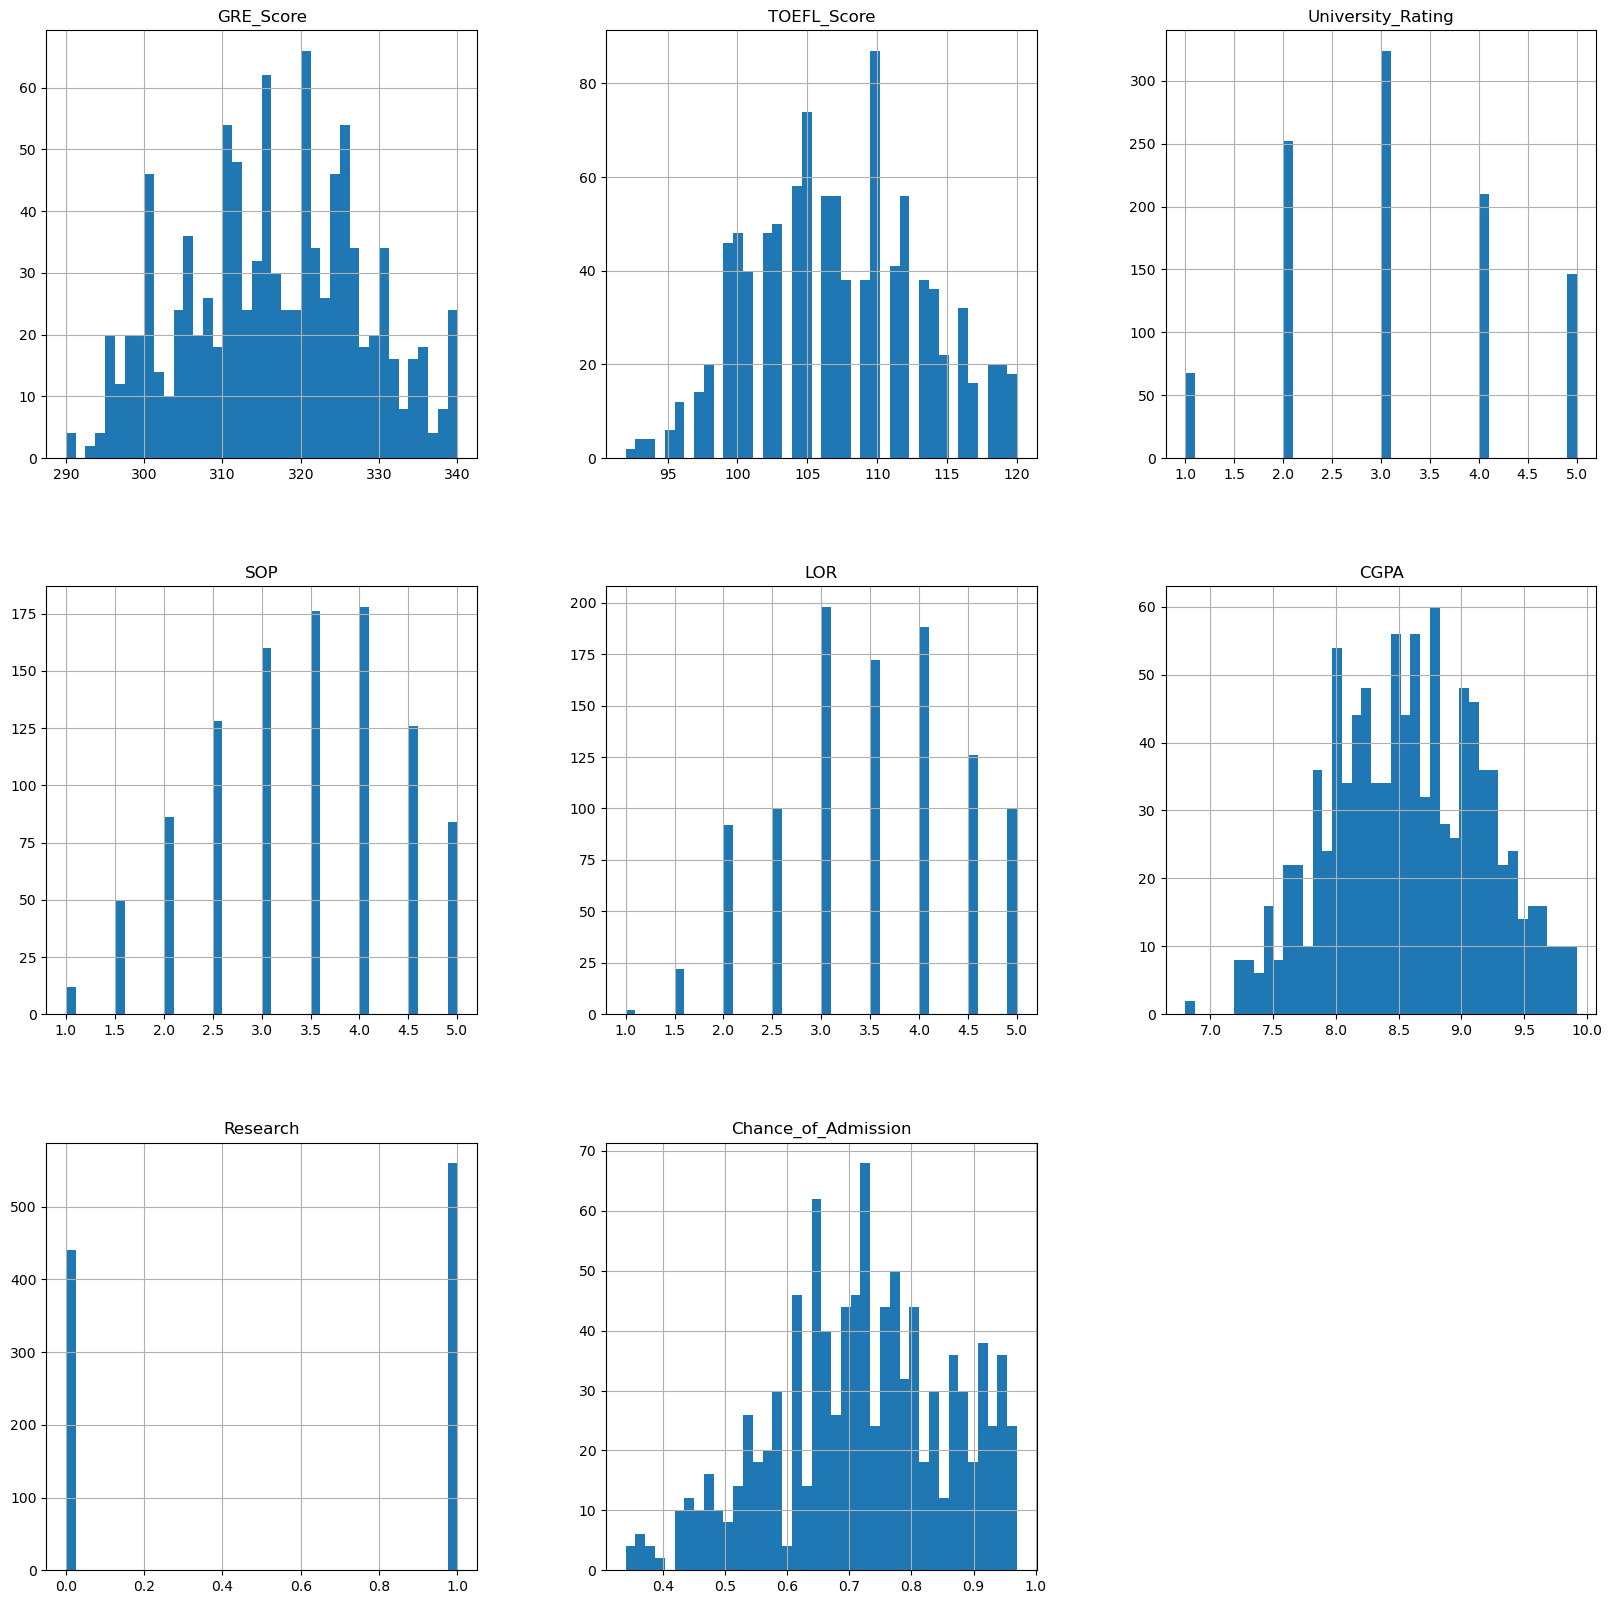

In [21]:
Data.hist(bins=40,figsize=(20,20))

### Prepaation of data
 

In [24]:
X=Data.drop(columns = ['Chance_of_Admission'],axis= 1)
Y=Data["Chance_of_Admission"]

In [26]:
print(X.shape)
print(Y.shape)

(1000, 7)
(1000,)


In [27]:
x=np.array(X)
y=np.array(Y)
print(x.shape)
print(y.shape)

(1000, 7)
(1000,)


In [29]:
y=y.reshape(-1,1)
y.shape

(1000, 1)